Task 01 Create a graph from graph.csv and load the contents from content.csv

In [ ]:
import pandas as pd
import networkx as nx
import nltk
nltk.download('punkt')
nltk.download('stopwords')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
graph_file_path = "/content/drive/MyDrive/Colab Notebooks/graph.csv"
graph_data = pd.read_csv(graph_file_path)


In [ ]:
graph = nx.DiGraph()

In [ ]:

print("Columns in graph.csv:", graph_data.columns)


source_col = graph_data.columns[0]
destination_col = graph_data.columns[1]


for index, row in graph_data.iterrows():
    graph.add_edge(row[source_col], row[destination_col])

print("Graph created with the following nodes and edges:")
print("Nodes:", graph.nodes())
print("Edges:", graph.edges())



Columns in graph.csv: Index(['Source', 'Target'], dtype='object')
Graph created with the following nodes and edges:
Nodes: ['https://learnpython.com/introduction', 'https://learnpython.com/basics', 'https://datasciencehub.com/overview', 'https://datasciencehub.com/statistics', 'https://aiworld.com/artificial-intelligence', 'https://aiworld.com/machine-learning', 'https://datasciencehub.com/tools', 'https://datasciencehub.com/big-data', 'https://datasciencehub.com/deep-learning', 'https://datasciencehub.com/time-series-analysis', 'https://aiworld.com/natural-language-processing', 'https://blockchaininsights.com/nft', 'https://blockchaininsights.com/technology', 'https://blockchaininsights.com/cryptocurrencies', 'https://blockchaininsights.com/ethereum', 'https://cybersecurityworld.com/basics', 'https://cybersecurityworld.com/threats', 'https://cybersecurityworld.com/blockchain-security', 'https://datasciencehub.com/machine-learning-algorithms', 'https://techhistory.com/internet', 'https

In [ ]:
content_file_path = "/content/drive/MyDrive/Colab Notebooks/content.csv"
content_data = pd.read_csv(content_file_path)

In [ ]:
print("\nColumn names in the loaded content data:")
print(content_data.columns)


content_data.columns = content_data.columns.str.strip()

print("\nCleaned column names:")
print(content_data.columns)


if 'Node' in content_data.columns and 'Content' in content_data.columns:

    content_dict = dict(zip(content_data['Node'], content_data['Content']))

    print("\nContent dictionary:")
    for key, value in content_dict.items():
        print(f"Node {key}: {value}")
else:
    print("\nThe required columns 'Node' and 'Content' are not found in the content data.")
    print("Please check the actual column names and update the code accordingly.")


Column names in the loaded content data:
Index(['URL', 'Title', 'Content'], dtype='object')

Cleaned column names:
Index(['URL', 'Title', 'Content'], dtype='object')

The required columns 'Node' and 'Content' are not found in the content data.
Please check the actual column names and update the code accordingly.


Task 02 Create a figure of the graph using networkx libary.

In [ ]:
import matplotlib.pyplot as plt



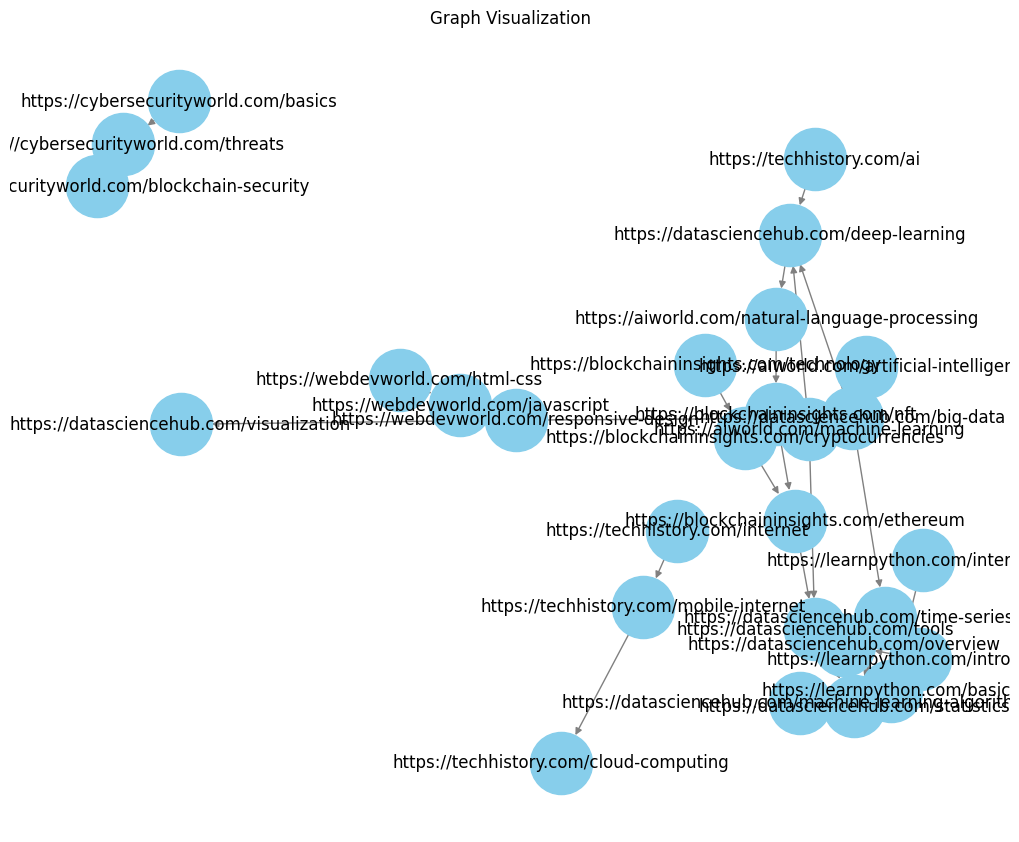

In [ ]:
plt.figure(figsize=(10, 8))
nx.draw(graph, with_labels=True, node_color='skyblue', edge_color='gray', node_size=2000, font_size=12)
plt.title("Graph Visualization")
plt.show()


Task 03 Tokenize the contents, and remove words like articles(a, an, the), prepositions, conjunctions. The nltk library can be used for this part.

In [ ]:
!pip install nltk


In [ ]:
import nltk
print(nltk.data.path)

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('all')



['/root/nltk_data', '/usr/nltk_data', '/usr/share/nltk_data', '/usr/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [ ]:
content_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/content.csv')
print(content_data.head())


                                           URL  \
0         https://learnpython.com/introduction   
1               https://learnpython.com/basics   
2  https://aiworld.com/artificial-intelligence   
3         https://aiworld.com/machine-learning   
4          https://datasciencehub.com/overview   

                              Title  \
0            Introduction to Python   
1                     Python Basics   
2  What is Artificial Intelligence?   
3    Understanding Machine Learning   
4             What is Data Science?   

                                             Content  
0  Python is a versatile programming language use...  
1  The basics of Python include variables, loops,...  
2  Artificial Intelligence (AI) refers to the sim...  
3  Machine Learning (ML) is a subset of AI that e...  
4  Data Science combines statistics, programming,...  


In [ ]:

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords





print("Columns in the dataset:", content_data.columns)


if 'PageID' not in content_data.columns:
    print("PageID column not found. Creating it...")
    content_data['PageID'] = range(1, len(content_data) + 1)


stop_words = set(stopwords.words('english'))


content_data['Cleaned_Content'] = content_data['Content'].apply(lambda x: ' '.join(
    [word for word in word_tokenize(x.lower()) if word.isalnum() and word not in stop_words]
))


print(content_data[['PageID', 'Cleaned_Content']])


Columns in the dataset: Index(['URL', 'Title', 'Content', 'Cleaned_Content'], dtype='object')
PageID column not found. Creating it...
    PageID                                    Cleaned_Content
0        1  python versatile programming language used web...
1        2  basics python include variables loops conditio...
2        3  artificial intelligence ai refers simulation h...
3        4  machine learning ml subset ai enables computer...
4        5  data science combines statistics programming d...
5        6  popular tools data science include jupyter not...
6        7  html hypertext markup language standard struct...
7        8  javascript programming language used add inter...
8        9  blockchain decentralized ledger technology pow...
9       10  cryptocurrencies digital currencies built bloc...
10      11  internet started arpanet us military project 1...
11      12  history ai dates back 1950s early work machine...


Task 04 Build an inverted index (It was covered in class, just use the given code)

In [ ]:
inverted_index = {}

for index, row in content_data.iterrows():
    page_id = row['PageID']
    words = row['Cleaned_Content'].split()
    for word in words:
        if word not in inverted_index:
            inverted_index[word] = []
        inverted_index[word].append(page_id)

print("Inverted Index:", inverted_index)


Inverted Index: {'python': [1, 1, 2, 2, 6], 'versatile': [1], 'programming': [1, 5, 8], 'language': [1, 2, 3, 7, 8], 'used': [1, 5, 6, 7, 8], 'web': [1, 7, 7, 8, 11], 'development': [1, 7], 'data': [1, 4, 5, 5, 5, 5, 6, 6, 6, 9], 'science': [1, 5, 6], 'ai': [1, 3, 3, 4, 12, 12], 'known': [1], 'simple': [1], 'syntax': [1], 'powerful': [1], 'libraries': [1, 6], 'numpy': [1], 'pandas': [1, 6], 'tensorflow': [1], 'many': [1], 'developers': [1], 'prefer': [1], 'community': [1], 'support': [1], 'ease': [1], 'learning': [1, 4, 4, 4, 4, 5, 12, 12], 'basics': [2], 'include': [2, 4, 4, 5, 6, 8, 10, 11], 'variables': [2], 'loops': [2], 'conditional': [2], 'statements': [2], 'functions': [2], 'interpreted': [2], 'means': [2], 'write': [2], 'execute': [2], 'code': [2, 2], 'interactively': [2], 'flexibility': [2], 'makes': [2], 'suitable': [2], 'prototyping': [2], 'artificial': [3], 'intelligence': [3, 3], 'refers': [3], 'simulation': [3], 'human': [3], 'computers': [3, 4], 'involves': [3], 'tasks':

Task 05 Build a single word query based search system and rank the pages using the pagerank algorithm.

In [ ]:
page_rank = nx.pagerank(graph)
print("PageRank Scores:", page_rank)


PageRank Scores: {'https://learnpython.com/introduction': 0.006865794739342251, 'https://learnpython.com/basics': 0.015619683032003624, 'https://datasciencehub.com/overview': 0.2013730885702701, 'https://datasciencehub.com/statistics': 0.21757646928178512, 'https://aiworld.com/artificial-intelligence': 0.006865794739342251, 'https://aiworld.com/machine-learning': 0.012701720267783167, 'https://datasciencehub.com/tools': 0.2202561637888331, 'https://datasciencehub.com/big-data': 0.014372253950299382, 'https://datasciencehub.com/deep-learning': 0.02420815931046826, 'https://datasciencehub.com/time-series-analysis': 0.012974002668219492, 'https://aiworld.com/natural-language-processing': 0.027442730153240287, 'https://blockchaininsights.com/nft': 0.030192115369596526, 'https://blockchaininsights.com/technology': 0.006865794739342251, 'https://blockchaininsights.com/cryptocurrencies': 0.012701720267783167, 'https://blockchaininsights.com/ethereum': 0.04332555503111504, 'https://cybersecuri

In [ ]:
def single_word_search(query):
    query = query.lower()
    if query in inverted_index:
        pages = inverted_index[query]
        # Rank pages using PageRank scores
        ranked_pages = sorted(pages, key=lambda x: page_rank.get(str(x), 0), reverse=True)
        return ranked_pages
    else:
        return []


query = 'Artificial'
print(f"Search results for '{query}':", single_word_search(query))


Search results for 'Artificial': [3]


Task 06 Implement a bag of word query based search system. In bag of words search system, someone searches with multiple words and the search engine will return the pages where at least one of the words appear.

In [ ]:
def bag_of_words_search(query):
    query_words = query.lower().split()
    relevant_pages = set()

    for word in query_words:
        if word in inverted_index:
            relevant_pages.update(inverted_index[word])


    ranked_pages = sorted(relevant_pages, key=lambda x: page_rank.get(str(x), 0), reverse=True)
    return ranked_pages


query = 'Understanding Machine Learning'
print(f"Search results for '{query}':", bag_of_words_search(query))


Search results for 'Understanding Machine Learning': [1, 12, 4, 5]
